<a href="https://colab.research.google.com/github/mariachurches/AprendizajeSupervisado/blob/main/Enunciado_C1_P1/Actividad_C1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convocatoria 1 - Proyecto 1

#### 0) Cargar una de las imágenes histológicas

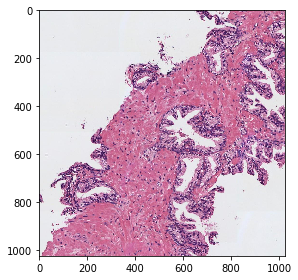

In [2]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen
from skimage import io
from sklearn import preprocessing
import numpy as np

# Carga de datos.
img = io.imread("/content/histo_1.jpg")

# Limpieza de datos: normalización.
img_nor = img/255

# Salida de resultados.
io.imshow(img_nor)

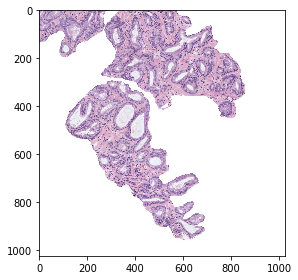

In [3]:
# Repetimos el procedimiento con la segunda imagen.
img2 = io.imread("/content/histo_2.jpg")
img2_nor = img2/255
io.imshow(img2_nor)

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

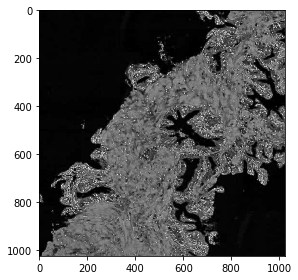

In [4]:
# Repetimos el procedimiento con la segunda imagen.

with np.errstate(invalid='ignore', divide='ignore'):
    K = 255 - np.max(img_nor, axis=2)
    C = (255-img_nor[...,0] - K)/(255-K)
    M = (255-img_nor[...,1] - K)/(255-K)
    Y = (255-img_nor[...,2] - K)/(255-K)

io.imshow(M)

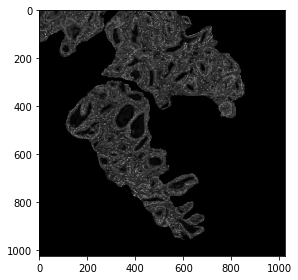

In [5]:
with np.errstate(invalid='ignore', divide='ignore'):
    K2 = 255 - np.max(img2_nor, axis=2)
    C2 = (255-img2_nor[...,0] - K2)/(255-K2)
    M2 = (255-img2_nor[...,1] - K2)/(255-K2)
    Y2 = (255-img2_nor[...,2] - K2)/(255-K2)
    
# Salida de resultados.
io.imshow(M2)

#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

255


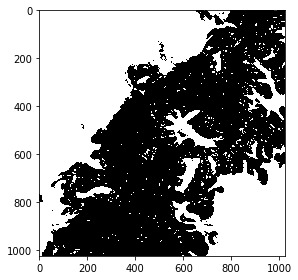

In [9]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante
import cv2
import matplotlib.pyplot as plt

#Desnormalizamos para introducir la imagen en el formato adecuado
M_nor = M*255

#Aplicamos un filtro gaussiano
img_gaus = cv2.GaussianBlur(M_nor, (5,5), 0).astype('uint8')
t, mask  = cv2.threshold(img_gaus,0,255,cv2.THRESH_OTSU) 
mask = np.invert(mask)
io.imshow(mask)

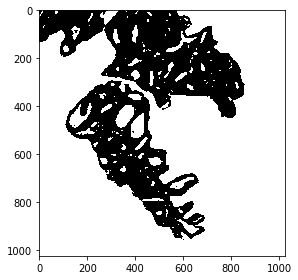

In [ ]:
# Repetimos el procedimiento con la segunda imagen.

M_nor2 = M2*255
img_gaus2 = cv2.GaussianBlur(M_nor2*255, (5,5), 0).astype('uint8')
t2, mask2  = cv2.threshold(img_gaus2,0,255,cv2.THRESH_OTSU) 
mask2 = np.invert(mask2)
io.imshow(mask2)

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """


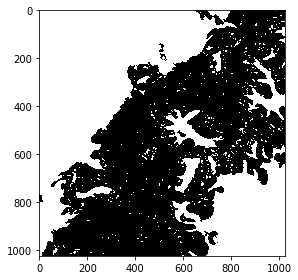

In [ ]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante
from skimage import morphology
removed =  morphology.remove_small_holes(mask, 300)
io.imshow(removed)
io.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  


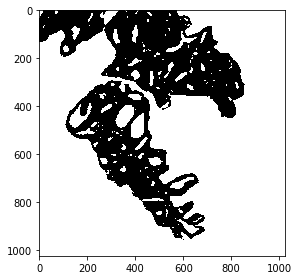

In [ ]:
# Repetimos el procedimiento con la segunda imagen.
removed2 =  morphology.remove_small_holes(mask2, 300)
io.imshow(removed2)
io.show()

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

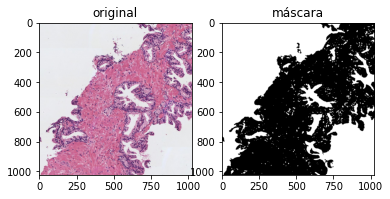

In [ ]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante. 

expansion = removed.copy()*255
h, w = img.shape[:2]
ref = np.zeros((h+2, w+2), np.uint8)
# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(expansion, ref, (0,0), 0) # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(expansion, cmap='gray'), ax[1].set_title('máscara')
plt.show()


#### 5) Rellenar los objetos de los lúmenes

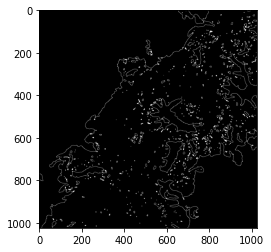

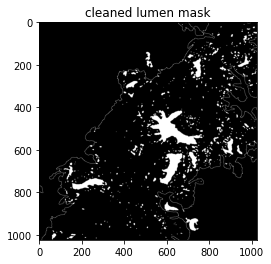

In [ ]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante

# Detección de bordes de Canny
canny = cv2.Canny(expansion.astype("uint8"), 255/3, 255) # minValue and maxValue. Canny recomiendo que minValue sea 3 veces mayor que maxValue\n",
kernel = np.ones((2,2), 'uint8')
canny = cv2.dilate(canny, kernel, iterations=2)
canny = cv2.erode(canny, kernel, iterations=2)
plt.imshow(canny, cmap='gray')
plt.show()

# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)
plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

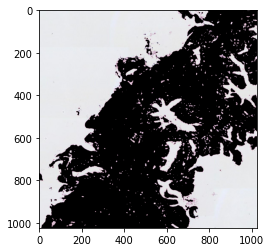

In [ ]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles. 
# Visualizar la imagen superpuesta
masc =bordes
res = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(res)


#### 7) Identificar y cropear el lumen más grande

In [ ]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import convex_hull_image

imagen = removed.copy()
for i in range(1, num+1): 
  objeto = lab == i
  objeto = objeto.astype('uint8')
  # bbox
  prop = regionprops(objeto)
  bbox = prop[0].bbox
  imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
  # covex hull\n",
  convex_image = convex_hull_image(objeto)
  convex_image = convex_image.astype('uint8')
  conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)
  plt.imshow(imagen, cmap='gray')
  plt.show()

TypeError: ignored

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado 

In [ ]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad